In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [310]:
paint_data = pd.read_csv('Full_Paint_Data.csv')
a70_data = pd.read_csv('A070 Since end of 2019.csv')
cal_data = pd.read_csv('Paint Calendars.csv')
cal_data = cal_data[cal_data['Period_Date_Shift']>=202012110]

In [311]:
cal_data

Calendar_Code  Calendar_Year  Calendar_Month  Calendar_Week  \
20771          PK01           2020              12             50   
20772          PK01           2020              12             50   
20773          PK01           2020              12             50   
20774          PK01           2020              12             50   
20775          PK01           2020              12             50   
...             ...            ...             ...            ...   
43687          PK02           2023              12             52   
43688          PK02           2023              12             52   
43689          PK02           2023              12             52   
43690          PK02           2023              12             52   
43691          PK02           2023              12             52   

         Period_Start_DateTime      Period_End_DateTime  \
20771  2020-12-11 07:20:00.000  2020-12-11 10:00:00.000   
20772  2020-12-11 10:15:00.000  2020-12-11 13:10:00.000   
20773  2020-12-11 13:40:00.000  2020-12-11 15:08:00.000   
20774  2020-12-11 15:30:00.000  2020-12-11 18:40:00.000   
20775  2020-12-11 19:10:00.000  2020-12-11 21:30:00.000   
...                        ...                      ...   
43687  2023-12-29 02:45:00.000  2023-12-29 05:00:00.000   
43688  2023-12-29 05:15:00.000  2023-12-29 07:15:00.000   
43689  2023-12-29 08:05:00.000  2023-12-29 09:50:00.000   
43690  2023-12-29 10:10:00.000  2023-12-29 12:00:00.000   
43691  2023-12-29 12:40:00.000  2023-12-29 15:00:00.000   

       Period_Working_Seconds  Period_Date_Shift  Period_Shift Period_Crew  \
20771                    9600          202012111             1           A   
20772                   10500          202012111             1           A   
20773                    5280          202012111             1           A   
20774                   11400          202012112             2           B   
20775                    8400          202012112             2           B   
...                       ...                ...           ...         ...   
43687                    8100          202312282             2           B   
43688                    7200          202312282             2           B   
43689                    6300          202312291             1           A   
43690                    6600          202312291             1           A   
43691                    8400          202312291             1           A   

       Unique_ID  Manual_Shift_Ended_Ind  
20771    9761526                       0  
20772    9761527                       0  
20773    9761528                       0  
20774    9761529                       0  
20775    9761530                       0  
...          ...                     ...  
43687   11373582                       0  
43688   11373583                       0  
43689   11373584                       0  
43690   11373585                       0  
43691   11373586                       0  

[9025 rows x 12 columns]

In [312]:
a70_data['PASS_DATE'] = pd.to_datetime(a70_data['PASS_DATE']) 

In [313]:
full_date_range = pd.date_range(start='2020-12-11 07:00:00', end='2022-04-15 22:00:00', freq='60T')

In [314]:
full_date_range.shape

(11776,)

In [315]:
dates_df = pd.DataFrame(full_date_range, columns=['time'])

In [316]:
dates_df.head(500)

time
0   2020-12-11 07:00:00
1   2020-12-11 08:00:00
2   2020-12-11 09:00:00
3   2020-12-11 10:00:00
4   2020-12-11 11:00:00
5   2020-12-11 12:00:00
6   2020-12-11 13:00:00
7   2020-12-11 14:00:00
8   2020-12-11 15:00:00
9   2020-12-11 16:00:00
10  2020-12-11 17:00:00
11  2020-12-11 18:00:00
12  2020-12-11 19:00:00
13  2020-12-11 20:00:00
14  2020-12-11 21:00:00
15  2020-12-11 22:00:00
16  2020-12-11 23:00:00
17  2020-12-12 00:00:00
18  2020-12-12 01:00:00
19  2020-12-12 02:00:00
20  2020-12-12 03:00:00
21  2020-12-12 04:00:00
22  2020-12-12 05:00:00
23  2020-12-12 06:00:00
24  2020-12-12 07:00:00
25  2020-12-12 08:00:00
26  2020-12-12 09:00:00
27  2020-12-12 10:00:00
28  2020-12-12 11:00:00
29  2020-12-12 12:00:00
30  2020-12-12 13:00:00
31  2020-12-12 14:00:00
32  2020-12-12 15:00:00
33  2020-12-12 16:00:00
34  2020-12-12 17:00:00
35  2020-12-12 18:00:00
36  2020-12-12 19:00:00
37  2020-12-12 20:00:00
38  2020-12-12 21:00:00
39  2020-12-12 22:00:00
40  2020-12-12 23:00:00
41  2020-12-13 00:00:00
42  2020-12-13 01:00:00
43  2020-12-13 02:00:00
44  2020-12-13 03:00:00
45  2020-12-13 04:00:00
46  2020-12-13 05:00:00
47  2020-12-13 06:00:00
48  2020-12-13 07:00:00
49  2020-12-13 08:00:00
50  2020-12-13 09:00:00
51  2020-12-13 10:00:00
52  2020-12-13 11:00:00
53  2020-12-13 12:00:00
54  2020-12-13 13:00:00
55  2020-12-13 14:00:00
56  2020-12-13 15:00:00
57  2020-12-13 16:00:00
58  2020-12-13 17:00:00
59  2020-12-13 18:00:00
60  2020-12-13 19:00:00
61  2020-12-13 20:00:00
62  2020-12-13 21:00:00
63  2020-12-13 22:00:00
64  2020-12-13 23:00:00
65  2020-12-14 00:00:00
66  2020-12-14 01:00:00
67  2020-12-14 02:00:00
68  2020-12-14 03:00:00
69  2020-12-14 04:00:00
70  2020-12-14 05:00:00
71  2020-12-14 06:00:00
72  2020-12-14 07:00:00
73  2020-12-14 08:00:00
74  2020-12-14 09:00:00
75  2020-12-14 10:00:00
76  2020-12-14 11:00:00
77  2020-12-14 12:00:00
78  2020-12-14 13:00:00
79  2020-12-14 14:00:00
80  2020-12-14 15:00:00
81  2020-12-14 16:00:00
82  2020-12-14 17:00:00
83  2020-12-14 18:00:00
84  2020-12-14 19:00:00
85  2020-12-14 20:00:00
86  2020-12-14 21:00:00
87  2020-12-14 22:00:00
88  2020-12-14 23:00:00
89  2020-12-15 00:00:00
90  2020-12-15 01:00:00
91  2020-12-15 02:00:00
92  2020-12-15 03:00:00
93  2020-12-15 04:00:00
94  2020-12-15 05:00:00
95  2020-12-15 06:00:00
96  2020-12-15 07:00:00
97  2020-12-15 08:00:00
98  2020-12-15 09:00:00
99  2020-12-15 10:00:00
100 2020-12-15 11:00:00
101 2020-12-15 12:00:00
102 2020-12-15 13:00:00
103 2020-12-15 14:00:00
104 2020-12-15 15:00:00
105 2020-12-15 16:00:00
106 2020-12-15 17:00:00
107 2020-12-15 18:00:00
108 2020-12-15 19:00:00
109 2020-12-15 20:00:00
110 2020-12-15 21:00:00
111 2020-12-15 22:00:00
112 2020-12-15 23:00:00
113 2020-12-16 00:00:00
114 2020-12-16 01:00:00
115 2020-12-16 02:00:00
116 2020-12-16 03:00:00
117 2020-12-16 04:00:00
118 2020-12-16 05:00:00
119 2020-12-16 06:00:00
120 2020-12-16 07:00:00
121 2020-12-16 08:00:00
122 2020-12-16 09:00:00
123 2020-12-16 10:00:00
124 2020-12-16 11:00:00
125 2020-12-16 12:00:00
126 2020-12-16 13:00:00
127 2020-12-16 14:00:00
128 2020-12-16 15:00:00
129 2020-12-16 16:00:00
130 2020-12-16 17:00:00
131 2020-12-16 18:00:00
132 2020-12-16 19:00:00
133 2020-12-16 20:00:00
134 2020-12-16 21:00:00
135 2020-12-16 22:00:00
136 2020-12-16 23:00:00
137 2020-12-17 00:00:00
138 2020-12-17 01:00:00
139 2020-12-17 02:00:00
140 2020-12-17 03:00:00
141 2020-12-17 04:00:00
142 2020-12-17 05:00:00
143 2020-12-17 06:00:00
144 2020-12-17 07:00:00
145 2020-12-17 08:00:00
146 2020-12-17 09:00:00
147 2020-12-17 10:00:00
148 2020-12-17 11:00:00
149 2020-12-17 12:00:00
150 2020-12-17 13:00:00
151 2020-12-17 14:00:00
152 2020-12-17 15:00:00
153 2020-12-17 16:00:00
154 2020-12-17 17:00:00
155 2020-12-17 18:00:00
156 2020-12-17 19:00:00
157 2020-12-17 20:00:00
158 2020-12-17 21:00:00
159 2020-12-17 22:00:00
160 2020-12-17 23:00:00
161 2020-12-18 00:00:00
162 2020-12-18 01:00:00
163 2020-12-18 02:00:00
164 2020-12-18 03:00:00
165 2020-12-18 04:00:00
166 2020-12

In [317]:
dates_df['time'] = pd.to_datetime( dates_df['time'])

In [318]:
meter_list = paint_data['metric'].unique()

In [319]:
dates_df.shape

(11776, 1)

In [320]:
full_date_range.shape

(11776,)

In [321]:
dates_df.shape

(11776, 1)

In [322]:
for meter in meter_list:
    globals()[meter] = paint_data.loc[paint_data['metric']==meter].copy()
    globals()[meter].rename(columns={'value':meter}, inplace=True)
    globals()[meter] = globals()[meter].drop(['metric'], axis=1)
    globals()[meter]['time'] = pd.to_datetime(globals()[meter]['time'])
    

In [323]:
for meter in meter_list:
    dates_df = dates_df.merge(globals()[meter], on='time', how='left')
    print(dates_df.shape)

(11776, 2)
(11776, 3)
(11776, 4)
(11776, 5)
(11776, 6)
(11776, 7)
(11776, 8)
(11776, 9)
(11776, 10)
(11776, 11)
(11776, 12)


In [324]:
dates_df_filled = dates_df.fillna(0)

In [325]:
dates_df_filled.shape

(11776, 12)

In [326]:
dates_df_filled.set_index('time', inplace=True)

In [327]:
dates_df_filled.shape

(11776, 11)

In [328]:
dates_df_filled.head(500)

E_C100  E_C200  E_C300  E_C400  E_C1200  E_C500  E_C600  \
time                                                                           
2020-12-11 07:00:00     0.0     0.0     0.0     0.0      0.0     0.0     0.0   
2020-12-11 08:00:00     0.0     0.0     0.0     0.0      0.0     0.0     0.0   
2020-12-11 09:00:00     0.0     0.0     0.0     0.0      0.0     0.0     0.0   
2020-12-11 10:00:00   510.0    60.0     0.0     0.0      0.0     0.0     0.0   
2020-12-11 11:00:00  1100.0   690.0   550.0   470.0      0.0     0.0     0.0   
2020-12-11 12:00:00  1070.0   690.0   550.0   620.0      0.0     0.0     0.0   
2020-12-11 13:00:00  1050.0   690.0   570.0   640.0      0.0     0.0     0.0   
2020-12-11 14:00:00  1050.0   690.0   600.0   620.0      0.0     0.0     0.0   
2020-12-11 15:00:00  1050.0   690.0   560.0   630.0      0.0     0.0     0.0   
2020-12-11 16:00:00  1070.0   680.0   640.0   630.0      0.0     0.0     0.0   
2020-12-11 17:00:00  1060.0   700.0   710.0   640.0      0.0     0.0     0.0   
2020-12-11 18:00:00  1040.0   680.0   530.0   630.0      0.0     0.0     0.0   
2020-12-11 19:00:00  1040.0   690.0   620.0   650.0      0.0     0.0     0.0   
2020-12-11 20:00:00  1050.0   680.0   640.0   630.0      0.0     0.0     0.0   
2020-12-11 21:00:00  1050.0   690.0   550.0   650.0      0.0     0.0     0.0   
2020-12-11 22:00:00   980.0   670.0   550.0   610.0      0.0     0.0     0.0   
2020-12-11 23:00:00   800.0   530.0   220.0   470.0      0.0     0.0     0.0   
2020-12-12 00:00:00   670.0   310.0    20.0   370.0      0.0     0.0     0.0   
2020-12-12 01:00:00   410.0   250.0    10.0   340.0      0.0     0.0     0.0   
2020-12-12 02:00:00   290.0   240.0    10.0   330.0      0.0     0.0     0.0   
2020-12-12 03:00:00   290.0   260.0    10.0   310.0      0.0     0.0     0.0   
2020-12-12 04:00:00   310.0   310.0    10.0   380.0      0.0     0.0     0.0   
2020-12-12 05:00:00   580.0   500.0    10.0   450.0      0.0     0.0     0.0   
2020-12-12 06:00:00   890.0   640.0    30.0   550.0      0.0     0.0     0.0   
2020-12-12 07:00:00   960.0   640.0   580.0   600.0      0.0     0.0     0.0   
2020-12-12 08:00:00  1030.0   680.0   700.0   620.0      0.0     0.0     0.0   
2020-12-12 09:00:00  1010.0   700.0   620.0   630.0      0.0     0.0     0.0   
2020-12-12 10:00:00   990.0   680.0   680.0   620.0      0.0     0.0     0.0   
2020-12-12 11:00:00  1000.0   700.0   570.0   630.0      0.0     0.0     0.0   
2020-12-12 12:00:00   880.0   530.0   390.0   540.0      0.0     0.0     0.0   
2020-12-12 13:00:00   840.0   260.0   220.0   540.0      0.0     0.0     0.0   
2020-12-12 14:00:00   850.0   270.0   370.0   530.0      0.0     0.0     0.0   
2020-12-12 15:00:00   760.0   250.0    70.0   440.0      0.0     0.0     0.0   
2020-12-12 16:00:00   400.0   220.0    10.0   270.0      0.0     0.0     0.0   
2020-12-12 17:00:00   170.0   210.0    10.0   270.0      0.0     0.0     0.0   
2020-12-12 18:00:00   140.0   210.0    10.0   260.0      0.0     0.0     0.0   
2020-12-12 19:00:00   140.0   210.0    10.0   270.0      0.0     0.0     0.0   
2020-12-12 20:00:00   130.0   210.0    10.0   270.0      0.0     0.0     0.0   
2020-12-12 21:00:00   130.0   210.0    10.0   260.0      0.0     0.0     0.0   
2020-12-12 22:00:00   130.0   200.0    10.0   240.0      0.0     0.0     0.0   
2020-12-12 23:00:00   130.0   210.0    10.0   250.0      0.0     0.0     0.0   
2020-12-13 00:00:00   120.0   200.0    10.0   240.0      0.0     0.0     0.0   
2020-12-13 01:00:00   130.0   210.0    10.0   230.0      0.0     0.0     0.0   
2020-12-13 02:00:00   130.0   200.0    10.0   230.0      0.0     0.0     0.0   
2020-12-13 03:00:00   130.0   210.0    10.0   230.0      0.0     0.0     0.0   
2020-12-13 04:00:00   120.0   210.0    10.0   230.0      0.0     0.0     0.0   
2020-12-13 05:00:00   120.0   210.0    10.0   230.0      0.0     0.0     0.0   
2020-12-13 06:00:00   120.0   200.0    10.0   260.0      0.0     0.0     0.0   
2020-12-13 07:00:00  

In [329]:
for i in dates_df_filled.columns:
    dates_df_filled[i][dates_df_filled[i]>1500] = 1500

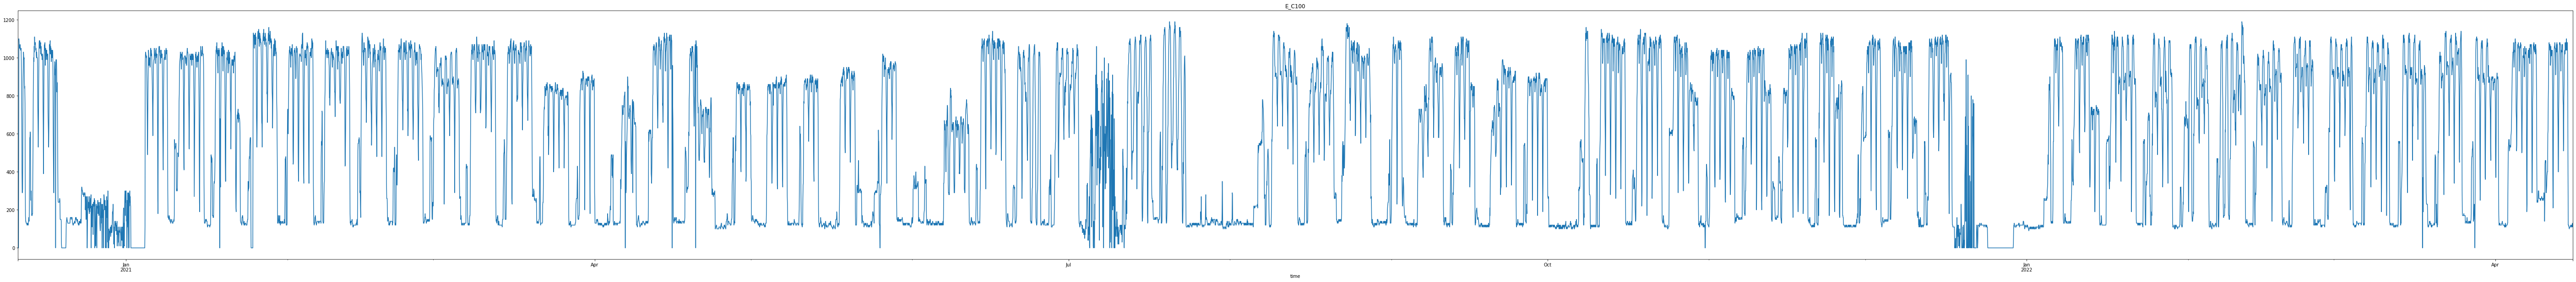

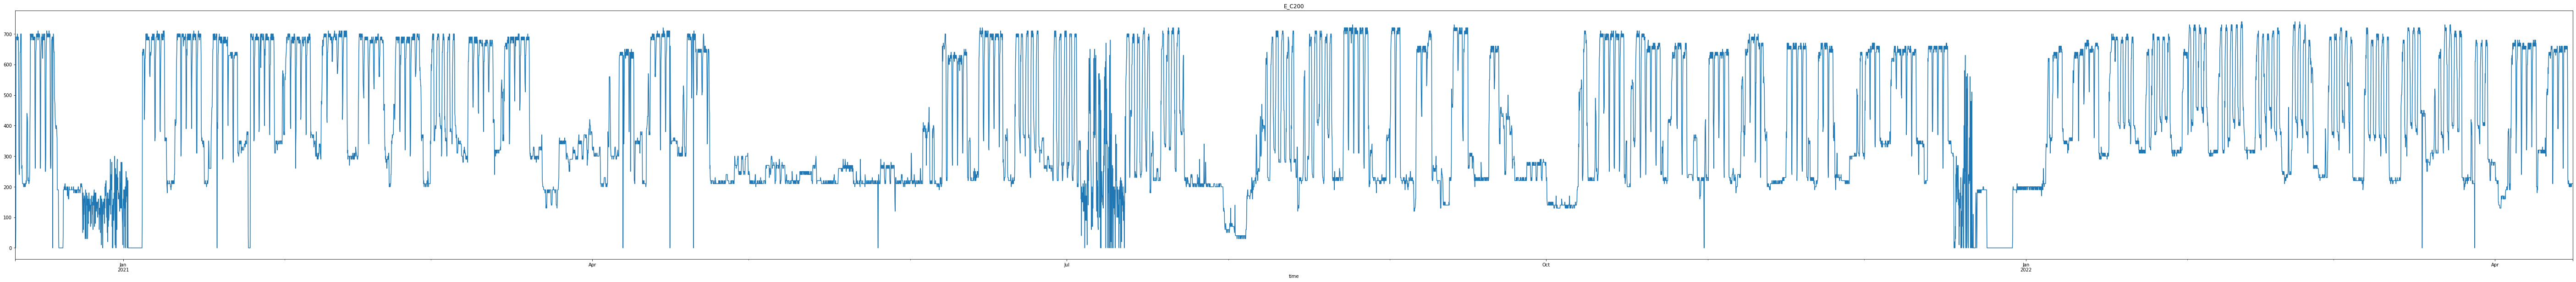

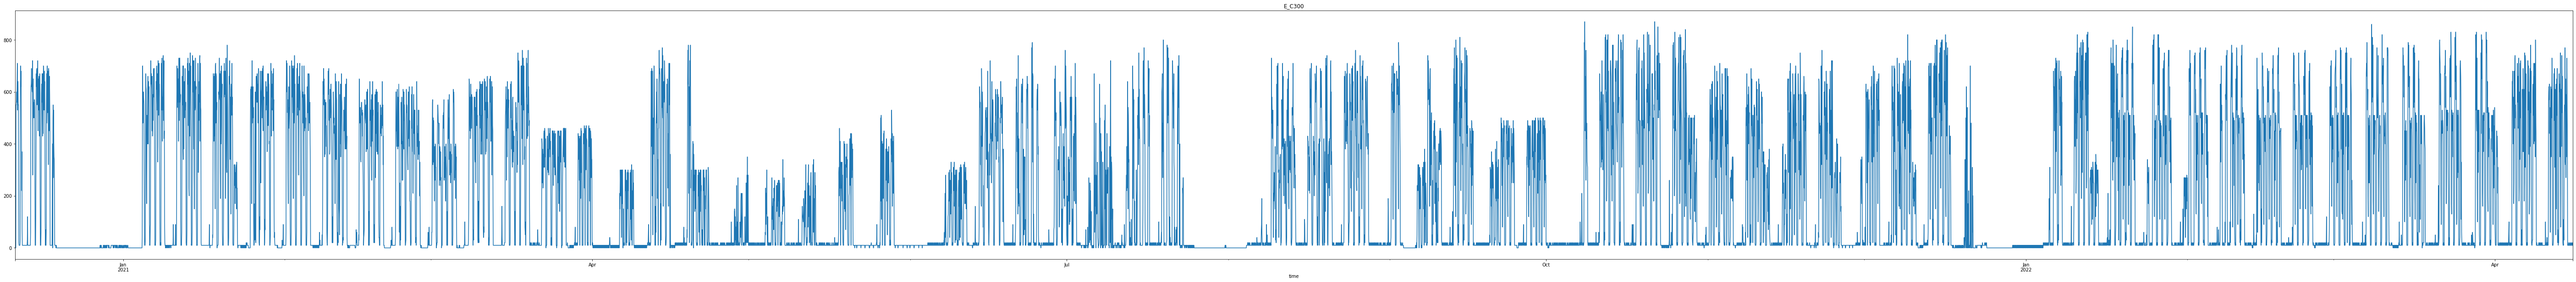

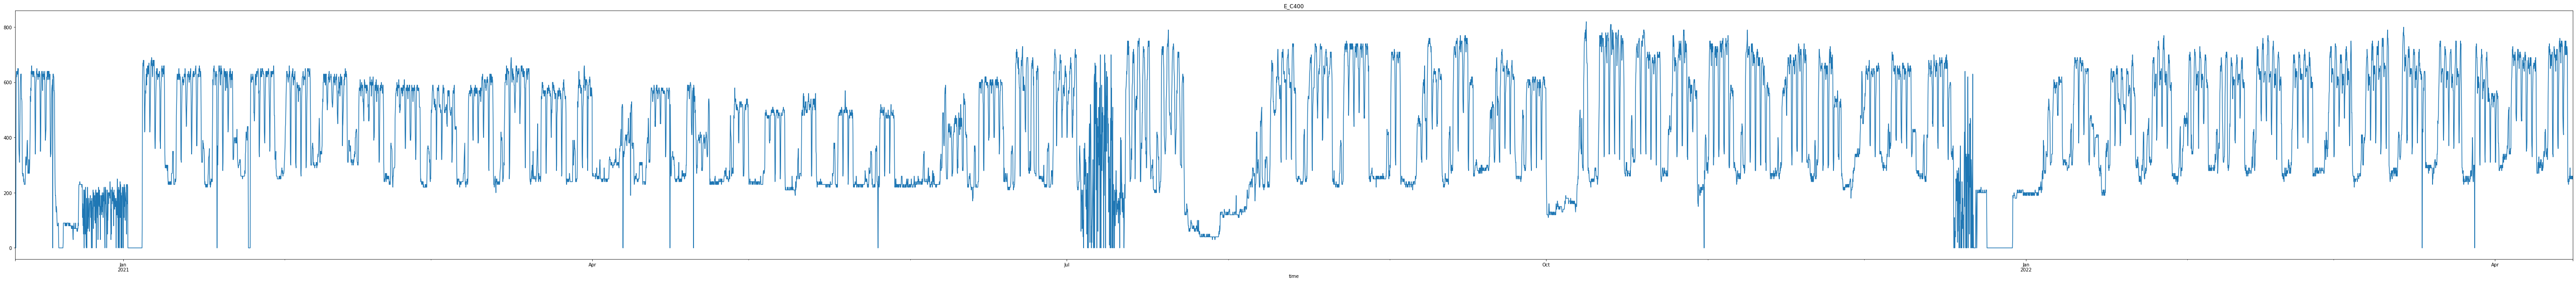

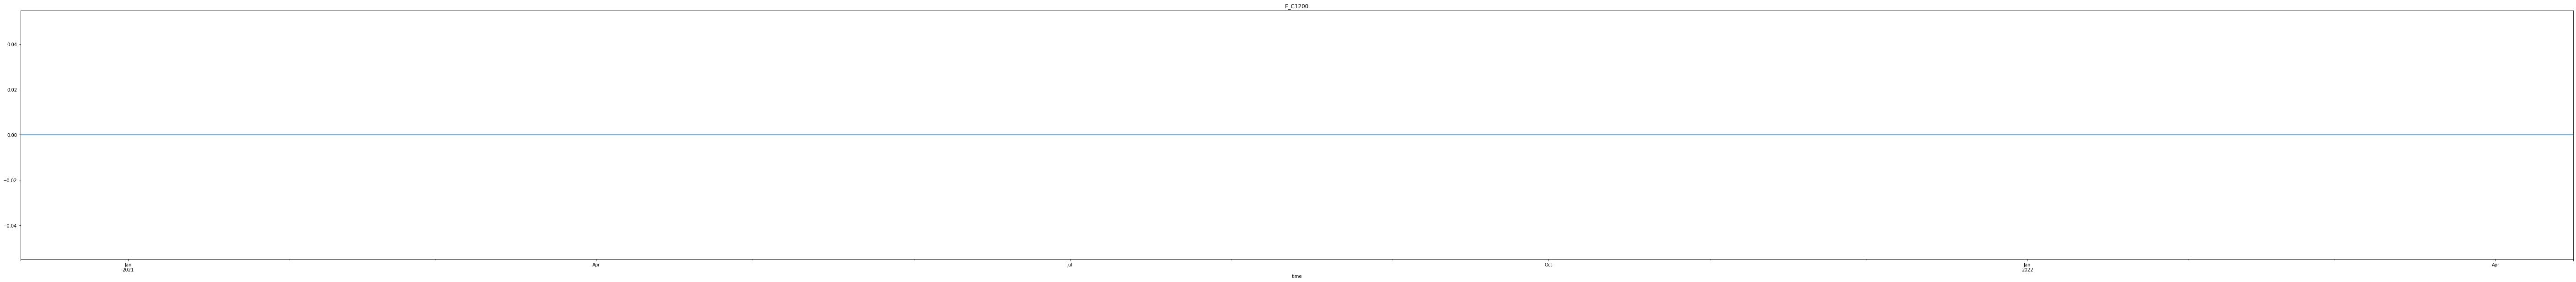

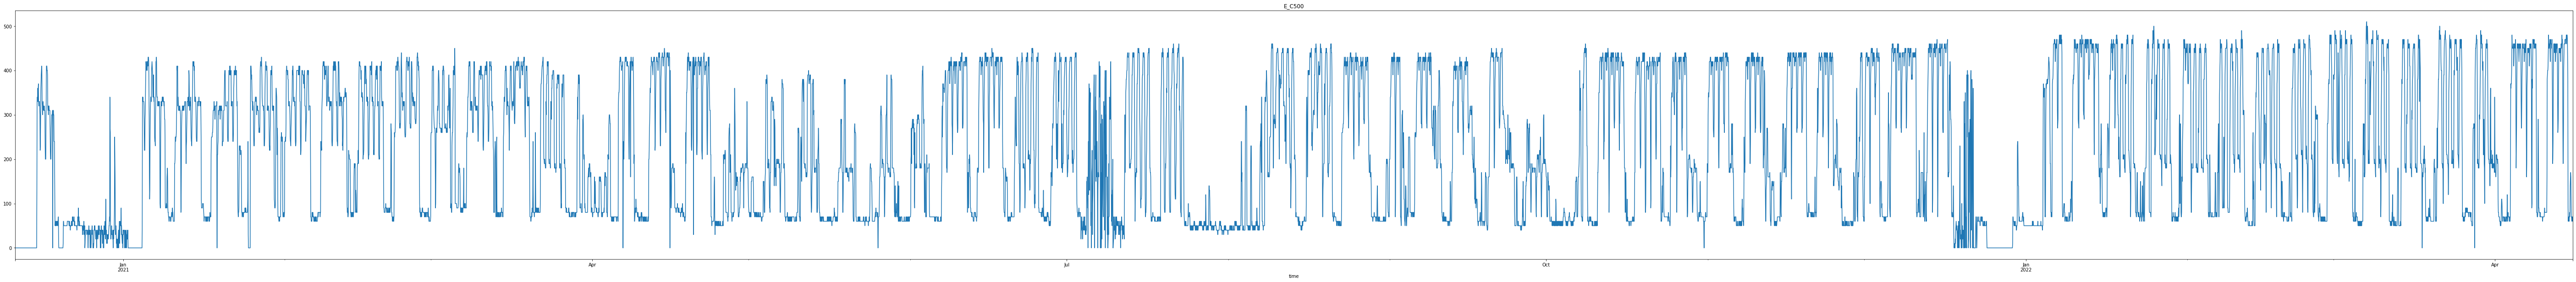

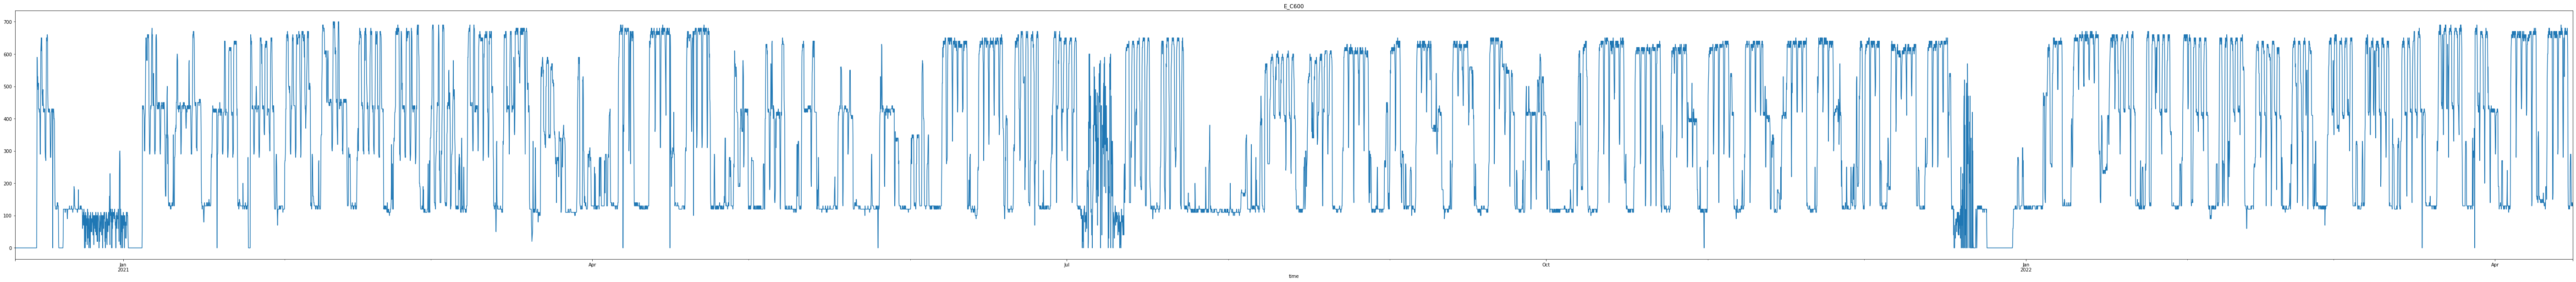

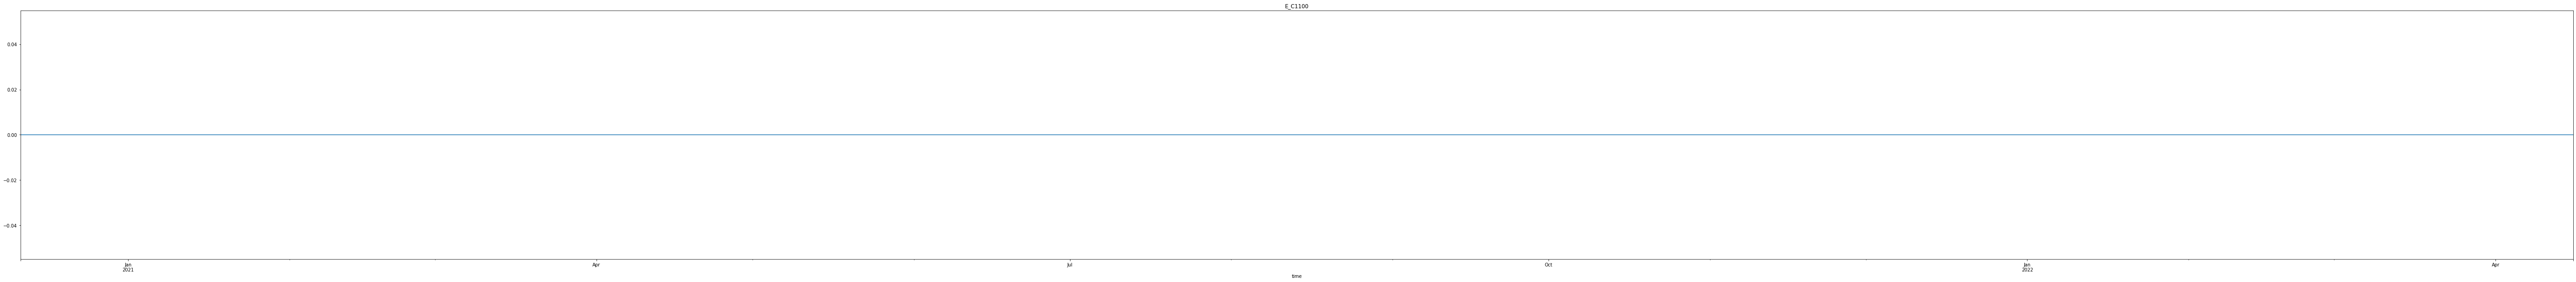

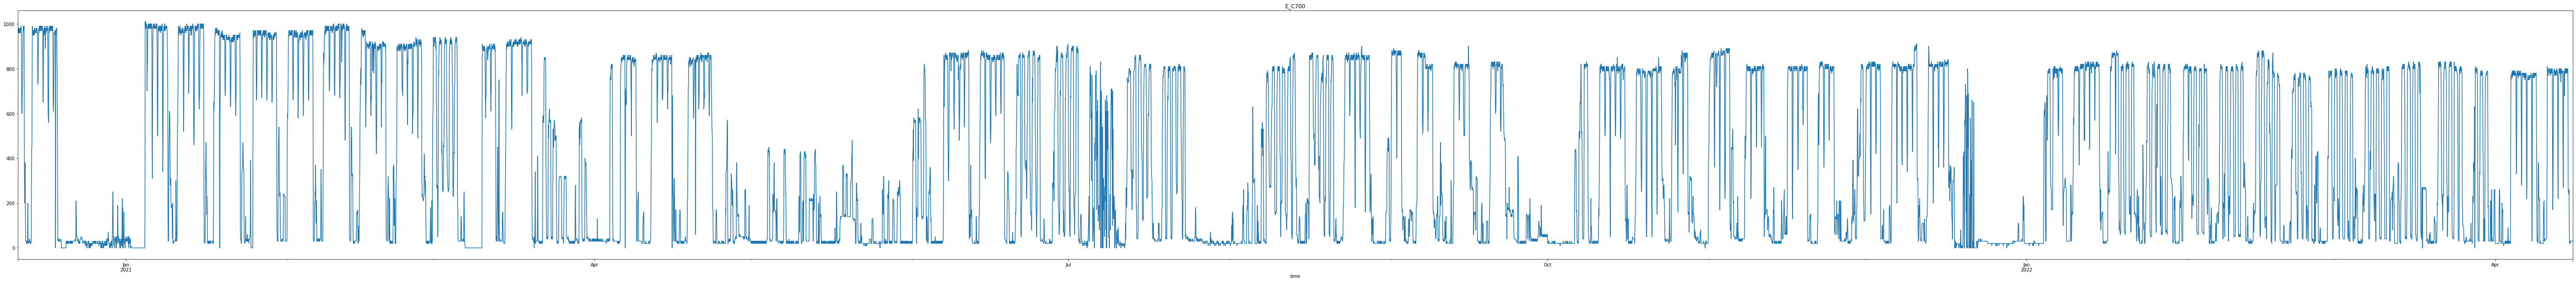

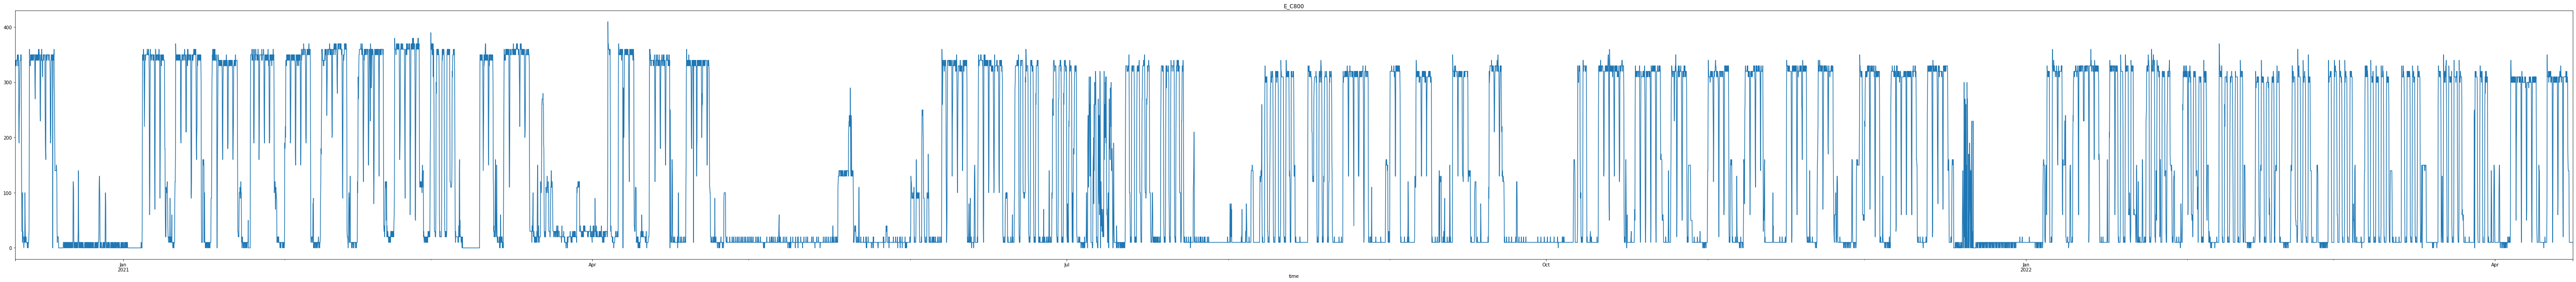

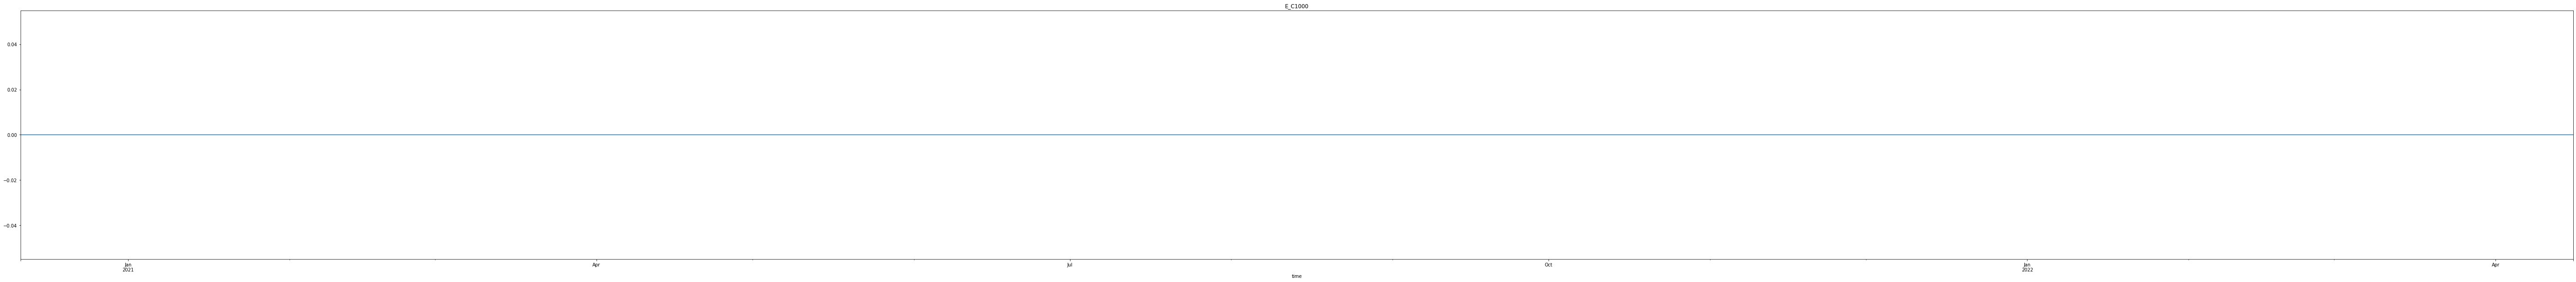

In [330]:
for i in dates_df_filled.columns:
    plt.figure()
    dates_df_filled[i].plot(figsize=(100,10), title=i)

In [331]:
11776*11

129536

In [332]:
pd.DataFrame(full_date_range).shape

(11776, 1)

In [333]:
pd.set_option('display.max_rows', 800)
paint_data.sort_values(['metric', 'time']).head(500)

metric   value                 time
0    E_C100   510.0  2020-12-11 10:00:00
1    E_C100  1100.0  2020-12-11 11:00:00
2    E_C100  1070.0  2020-12-11 12:00:00
3    E_C100  1050.0  2020-12-11 13:00:00
4    E_C100  1050.0  2020-12-11 14:00:00
5    E_C100  1050.0  2020-12-11 15:00:00
6    E_C100  1070.0  2020-12-11 16:00:00
7    E_C100  1060.0  2020-12-11 17:00:00
8    E_C100  1040.0  2020-12-11 18:00:00
9    E_C100  1040.0  2020-12-11 19:00:00
10   E_C100  1050.0  2020-12-11 20:00:00
11   E_C100  1050.0  2020-12-11 21:00:00
12   E_C100   980.0  2020-12-11 22:00:00
13   E_C100   800.0  2020-12-11 23:00:00
14   E_C100   670.0  2020-12-12 00:00:00
15   E_C100   410.0  2020-12-12 01:00:00
16   E_C100   290.0  2020-12-12 02:00:00
17   E_C100   290.0  2020-12-12 03:00:00
18   E_C100   310.0  2020-12-12 04:00:00
19   E_C100   580.0  2020-12-12 05:00:00
20   E_C100   890.0  2020-12-12 06:00:00
21   E_C100   960.0  2020-12-12 07:00:00
22   E_C100  1030.0  2020-12-12 08:00:00
23   E_C100  1010.0  2020-12-12 09:00:00
24   E_C100   990.0  2020-12-12 10:00:00
25   E_C100  1000.0  2020-12-12 11:00:00
26   E_C100   880.0  2020-12-12 12:00:00
27   E_C100   840.0  2020-12-12 13:00:00
28   E_C100   850.0  2020-12-12 14:00:00
29   E_C100   760.0  2020-12-12 15:00:00
30   E_C100   400.0  2020-12-12 16:00:00
31   E_C100   170.0  2020-12-12 17:00:00
32   E_C100   140.0  2020-12-12 18:00:00
33   E_C100   140.0  2020-12-12 19:00:00
34   E_C100   130.0  2020-12-12 20:00:00
35   E_C100   130.0  2020-12-12 21:00:00
36   E_C100   130.0  2020-12-12 22:00:00
37   E_C100   130.0  2020-12-12 23:00:00
38   E_C100   120.0  2020-12-13 00:00:00
39   E_C100   130.0  2020-12-13 01:00:00
40   E_C100   130.0  2020-12-13 02:00:00
41   E_C100   130.0  2020-12-13 03:00:00
42   E_C100   120.0  2020-12-13 04:00:00
43   E_C100   120.0  2020-12-13 05:00:00
44   E_C100   120.0  2020-12-13 06:00:00
45   E_C100   140.0  2020-12-13 07:00:00
46   E_C100   160.0  2020-12-13 08:00:00
47   E_C100   160.0  2020-12-13 09:00:00
48   E_C100   140.0  2020-12-13 10:00:00
49   E_C100   190.0  2020-12-13 11:00:00
50   E_C100   420.0  2020-12-13 12:00:00
51   E_C100   580.0  2020-12-13 13:00:00
52   E_C100   580.0  2020-12-13 14:00:00
53   E_C100   610.0  2020-12-13 15:00:00
54   E_C100   600.0  2020-12-13 16:00:00
55   E_C100   290.0  2020-12-13 17:00:00
56   E_C100   250.0  2020-12-13 18:00:00
57   E_C100   300.0  2020-12-13 19:00:00
58   E_C100   260.0  2020-12-13 20:00:00
59   E_C100   180.0  2020-12-13 21:00:00
60   E_C100   170.0  2020-12-13 22:00:00
61   E_C100   170.0  2020-12-13 23:00:00
62   E_C100   170.0  2020-12-14 00:00:00
63   E_C100   180.0  2020-12-14 01:00:00
64   E_C100   180.0  2020-12-14 02:00:00
65   E_C100   400.0  2020-12-14 03:00:00
66   E_C100   530.0  2020-12-14 04:00:00
67   E_C100   810.0  2020-12-14 05:00:00
68   E_C100   890.0  2020-12-14 06:00:00
69   E_C100  1000.0  2020-12-14 07:00:00
70   E_C100   980.0  2020-12-14 08:00:00
71   E_C100  1060.0  2020-12-14 09:00:00
72   E_C100  1030.0  2020-12-14 10:00:00
73   E_C100  1110.0  2020-12-14 11:00:00
74   E_C100  1070.0  2020-12-14 12:00:00
75   E_C100  1080.0  2020-12-14 13:00:00
76   E_C100  1070.0  2020-12-14 14:00:00
77   E_C100  1080.0  2020-12-14 15:00:00
78   E_C100  1040.0  2020-12-14 16:00:00
79   E_C100  1050.0  2020-12-14 17:00:00
80   E_C100  1050.0  2020-12-14 18:00:00
81   E_C100  1010.0  2020-12-14 19:00:00
82   E_C100  1000.0  2020-12-14 20:00:00
83   E_C100  1030.0  2020-12-14 21:00:00
84   E_C100  1000.0  2020-12-14 22:00:00
85   E_C100  1000.0  2020-12-14 23:00:00
86   E_C100  1000.0  2020-12-15 00:00:00
87   E_C100   950.0  2020-12-15 01:00:00
88   E_C100   740.0  2020-12-15 02:00:00
89   E_C100   660.0  2020-12-15 03:00:00
90   E_C100   530.0  2020-12-15 04:00:00
91   E_C100   630.0  2020-12-15 05:00:00
92   E_C100   850.0  2020-12-15 06:00:00
93   E_C100  1000.0  2020-12-15 07:00:00
94   E_C100  1080.0  2020-12-15 08:00:00
95   E_C100  1090.0  2020-12-15 09:00:00
96   E_C100  1050.0  2020-12

In [334]:
dates_df_filled = dates_df_filled.rename_axis('time').reset_index()

In [335]:
dates_df_filled['is_prod'] = 0 

for i, shift in cal_data.iterrows():
    start = shift['Period_Start_DateTime']
    end = shift['Period_End_DateTime']
    dates_df_filled.loc[
        (dates_df_filled['time']>= start) 
        & (dates_df_filled['time']<= end), ['is_prod']
    ]=1

In [336]:
dates_df_filled.shape

(11776, 13)

In [337]:
a70_data_grouped =  a70_data.groupby(
    [a70_data['PASS_DATE'].dt.year,
     a70_data['PASS_DATE'].dt.month, 
    a70_data['PASS_DATE'].dt.day, 
    a70_data['PASS_DATE'].dt.hour])['VIN'].count()

dates = []
a70_counts = []

for i in a70_data_grouped.index:
    x= i
    dates.append(pd.Timestamp(year=i[0], month=i[1], day=i[2], hour=i[3]))
    a70_counts.append(a70_data_grouped[i])
    

a70_data_grouped = pd.DataFrame({'time': dates, 'Count':a70_counts})
a70_data_grouped

time  Count
0    2020-11-27 22:00:00      5
1    2020-11-27 23:00:00     19
2    2020-11-29 11:00:00      4
3    2020-11-30 06:00:00     14
4    2020-11-30 07:00:00     91
...                  ...    ...
6367 2022-06-29 06:00:00     63
6368 2022-06-29 07:00:00     71
6369 2022-06-29 08:00:00     56
6370 2022-06-29 09:00:00     75
6371 2022-06-29 10:00:00     27

[6372 rows x 2 columns]

In [341]:
a70_data_grouped.head(500)

time  Count
0   2020-11-27 22:00:00      5
1   2020-11-27 23:00:00     19
2   2020-11-29 11:00:00      4
3   2020-11-30 06:00:00     14
4   2020-11-30 07:00:00     91
5   2020-11-30 08:00:00     98
6   2020-11-30 09:00:00     87
7   2020-11-30 10:00:00     62
8   2020-11-30 11:00:00     91
9   2020-11-30 12:00:00     56
10  2020-11-30 13:00:00     62
11  2020-11-30 14:00:00     90
12  2020-11-30 15:00:00     89
13  2020-11-30 16:00:00     72
14  2020-11-30 17:00:00    100
15  2020-11-30 18:00:00    102
16  2020-11-30 19:00:00     75
17  2020-11-30 20:00:00     82
18  2020-11-30 21:00:00    104
19  2020-11-30 22:00:00     82
20  2020-11-30 23:00:00     80
21  2020-12-01 00:00:00     97
22  2020-12-01 01:00:00     90
23  2020-12-01 02:00:00      3
24  2020-12-01 06:00:00      4
25  2020-12-01 07:00:00     67
26  2020-12-01 08:00:00    100
27  2020-12-01 09:00:00     81
28  2020-12-01 10:00:00     96
29  2020-12-01 11:00:00     98
30  2020-12-01 12:00:00     79
31  2020-12-01 13:00:00     54
32  2020-12-01 14:00:00    107
33  2020-12-01 15:00:00    109
34  2020-12-01 16:00:00     53
35  2020-12-01 17:00:00     89
36  2020-12-01 18:00:00     81
37  2020-12-01 19:00:00     63
38  2020-12-01 20:00:00     78
39  2020-12-01 21:00:00    100
40  2020-12-01 22:00:00    100
41  2020-12-01 23:00:00     78
42  2020-12-02 00:00:00     97
43  2020-12-02 01:00:00     87
44  2020-12-02 02:00:00     11
45  2020-12-02 07:00:00     80
46  2020-12-02 08:00:00     90
47  2020-12-02 09:00:00     58
48  2020-12-02 10:00:00     67
49  2020-12-02 11:00:00     89
50  2020-12-02 12:00:00     63
51  2020-12-02 13:00:00     67
52  2020-12-02 14:00:00     91
53  2020-12-02 15:00:00    101
54  2020-12-02 16:00:00     64
55  2020-12-02 17:00:00     83
56  2020-12-02 18:00:00     93
57  2020-12-02 19:00:00     82
58  2020-12-02 20:00:00     69
59  2020-12-02 21:00:00    102
60  2020-12-02 22:00:00     92
61  2020-12-02 23:00:00     99
62  2020-12-03 00:00:00     99
63  2020-12-03 01:00:00     74
64  2020-12-03 02:00:00     18
65  2020-12-03 06:00:00     26
66  2020-12-03 07:00:00     77
67  2020-12-03 08:00:00     86
68  2020-12-03 09:00:00     84
69  2020-12-03 10:00:00     86
70  2020-12-03 11:00:00     86
71  2020-12-03 12:00:00     66
72  2020-12-03 13:00:00     55
73  2020-12-03 14:00:00     95
74  2020-12-03 15:00:00     95
75  2020-12-03 16:00:00     79
76  2020-12-03 17:00:00     87
77  2020-12-03 18:00:00    100
78  2020-12-03 19:00:00     70
79  2020-12-03 20:00:00     75
80  2020-12-03 21:00:00    103
81  2020-12-03 22:00:00     91
82  2020-12-03 23:00:00     85
83  2020-12-04 00:00:00     83
84  2020-12-04 01:00:00     61
85  2020-12-04 02:00:00     15
86  2020-12-04 06:00:00      6
87  2020-12-04 07:00:00    101
88  2020-12-04 08:00:00     78
89  2020-12-04 09:00:00     87
90  2020-12-04 10:00:00     79
91  2020-12-04 11:00:00    101
92  2020-12-04 12:00:00     85
93  2020-12-04 13:00:00     78
94  2020-12-04 14:00:00     65
95  2020-12-04 15:00:00     84
96  2020-12-04 16:00:00     89
97  2020-12-04 17:00:00    103
98  2020-12-04 18:00:00     59
99  2020-12-04 19:00:00     72
100 2020-12-04 20:00:00     88
101 2020-12-04 21:00:00     93
102 2020-12-04 22:00:00     89
103 2020-12-04 23:00:00     12
104 2020-12-05 07:00:00     57
105 2020-12-05 08:00:00     67
106 2020-12-05 09:00:00     64
107 2020-12-05 10:00:00     33
108 2020-12-05 11:00:00     56
109 2020-12-05 12:00:00     40
110 2020-12-05 13:00:00     17
111 2020-12-06 12:00:00      3
112 2020-12-06 21:00:00      1
113 2020-12-07 05:00:00      2
114 2020-12-07 06:00:00      6
115 2020-12-07 07:00:00     77
116 2020-12-07 08:00:00     88
117 2020-12-07 09:00:00     85
118 2020-12-07 10:00:00     75
119 2020-12-07 11:00:00     78
120 2020-12-07 12:00:00     69
121 2020-12-07 13:00:00     78
122 2020-12-07 14:00:00     81
123 2020-12-07 15:00:00     97
124 2020-12-07 16:00:00     65
125 2020-12-07 17:00:00     92
126 2020-12-07 18:00:00    108
127 2020-12-07 19:00:00     41
128 2020-12-07 20:00

In [342]:
dates_df_filled['time'] = pd.to_datetime(dates_df_filled['time']) 
dates_df_filled = dates_df_filled.merge(a70_data_grouped, on='time',how ='left')

In [343]:

dates_df_filled

time  E_C100  E_C200  E_C300  E_C400  E_C1200  E_C500  \
0     2020-12-11 07:00:00     0.0     0.0     0.0     0.0      0.0     0.0   
1     2020-12-11 08:00:00     0.0     0.0     0.0     0.0      0.0     0.0   
2     2020-12-11 09:00:00     0.0     0.0     0.0     0.0      0.0     0.0   
3     2020-12-11 10:00:00   510.0    60.0     0.0     0.0      0.0     0.0   
4     2020-12-11 11:00:00  1100.0   690.0   550.0   470.0      0.0     0.0   
...                   ...     ...     ...     ...     ...      ...     ...   
11771 2022-04-15 18:00:00   120.0   210.0    10.0   260.0      0.0    70.0   
11772 2022-04-15 19:00:00   130.0   210.0    10.0   250.0      0.0    70.0   
11773 2022-04-15 20:00:00   120.0   210.0    20.0   250.0      0.0    70.0   
11774 2022-04-15 21:00:00   110.0   210.0    10.0   260.0      0.0    60.0   
11775 2022-04-15 22:00:00   120.0   210.0    10.0   250.0      0.0    70.0   

       E_C600  E_C1100  E_C700  E_C800  E_C1000  is_prod  Count  
0         0.0      0.0   980.0   330.0      0.0        1   70.0  
1         0.0      0.0   960.0   330.0      0.0        1   90.0  
2         0.0      0.0   980.0   340.0      0.0        1   87.0  
3         0.0      0.0   970.0   330.0      0.0        1   91.0  
4         0.0      0.0   980.0   340.0      0.0        1   96.0  
...       ...      ...     ...     ...      ...      ...    ...  
11771   140.0      0.0    30.0    10.0      0.0        0    NaN  
11772   130.0      0.0    30.0    10.0      0.0        0    NaN  
11773   130.0      0.0    30.0    10.0      0.0        0    NaN  
11774   130.0      0.0    30.0    10.0      0.0        0    NaN  
11775   140.0      0.0    30.0    10.0      0.0        0    NaN  

[11776 rows x 14 columns]

In [344]:
metrics = []
times = []
isprods = []
values = []
counts = []

for meter in meter_list:
    values = np.append( values, dates_df_filled[meter]) 
    times = np.append(times, dates_df_filled['time'].astype(str))
    isprods = np.append(isprods,  dates_df_filled['is_prod']) 
    metrics = metrics + ([meter] * 11776)
    counts = np.append(counts, dates_df_filled['Count'])
    


In [345]:
df_paint_data_summary = pd.DataFrame({'metric': metrics,'value': values, 'time':times, 'is_prod':isprods, 'count':counts})

In [347]:
df_paint_data_summary.head(500)

metric   value                 time  is_prod  count
0    E_C100     0.0  2020-12-11 07:00:00      1.0   70.0
1    E_C100     0.0  2020-12-11 08:00:00      1.0   90.0
2    E_C100     0.0  2020-12-11 09:00:00      1.0   87.0
3    E_C100   510.0  2020-12-11 10:00:00      1.0   91.0
4    E_C100  1100.0  2020-12-11 11:00:00      1.0   96.0
5    E_C100  1070.0  2020-12-11 12:00:00      1.0   85.0
6    E_C100  1050.0  2020-12-11 13:00:00      1.0   71.0
7    E_C100  1050.0  2020-12-11 14:00:00      1.0   91.0
8    E_C100  1050.0  2020-12-11 15:00:00      1.0   86.0
9    E_C100  1070.0  2020-12-11 16:00:00      1.0  103.0
10   E_C100  1060.0  2020-12-11 17:00:00      1.0   96.0
11   E_C100  1040.0  2020-12-11 18:00:00      1.0   59.0
12   E_C100  1040.0  2020-12-11 19:00:00      1.0   84.0
13   E_C100  1050.0  2020-12-11 20:00:00      1.0  105.0
14   E_C100  1050.0  2020-12-11 21:00:00      1.0   74.0
15   E_C100   980.0  2020-12-11 22:00:00      1.0   97.0
16   E_C100   800.0  2020-12-11 23:00:00      1.0   18.0
17   E_C100   670.0  2020-12-12 00:00:00      0.0    NaN
18   E_C100   410.0  2020-12-12 01:00:00      0.0    NaN
19   E_C100   290.0  2020-12-12 02:00:00      0.0    NaN
20   E_C100   290.0  2020-12-12 03:00:00      0.0    NaN
21   E_C100   310.0  2020-12-12 04:00:00      0.0    NaN
22   E_C100   580.0  2020-12-12 05:00:00      0.0    NaN
23   E_C100   890.0  2020-12-12 06:00:00      0.0   16.0
24   E_C100   960.0  2020-12-12 07:00:00      1.0   80.0
25   E_C100  1030.0  2020-12-12 08:00:00      1.0   94.0
26   E_C100  1010.0  2020-12-12 09:00:00      1.0   74.0
27   E_C100   990.0  2020-12-12 10:00:00      1.0   95.0
28   E_C100  1000.0  2020-12-12 11:00:00      1.0  110.0
29   E_C100   880.0  2020-12-12 12:00:00      1.0   60.0
30   E_C100   840.0  2020-12-12 13:00:00      0.0   28.0
31   E_C100   850.0  2020-12-12 14:00:00      1.0   64.0
32   E_C100   760.0  2020-12-12 15:00:00      1.0   17.0
33   E_C100   400.0  2020-12-12 16:00:00      0.0    NaN
34   E_C100   170.0  2020-12-12 17:00:00      0.0    NaN
35   E_C100   140.0  2020-12-12 18:00:00      0.0    NaN
36   E_C100   140.0  2020-12-12 19:00:00      0.0    NaN
37   E_C100   130.0  2020-12-12 20:00:00      0.0    NaN
38   E_C100   130.0  2020-12-12 21:00:00      0.0    NaN
39   E_C100   130.0  2020-12-12 22:00:00      0.0    NaN
40   E_C100   130.0  2020-12-12 23:00:00      0.0    NaN
41   E_C100   120.0  2020-12-13 00:00:00      0.0    NaN
42   E_C100   130.0  2020-12-13 01:00:00      0.0    NaN
43   E_C100   130.0  2020-12-13 02:00:00      0.0    NaN
44   E_C100   130.0  2020-12-13 03:00:00      0.0    NaN
45   E_C100   120.0  2020-12-13 04:00:00      0.0    NaN
46   E_C100   120.0  2020-12-13 05:00:00      0.0    NaN
47   E_C100   120.0  2020-12-13 06:00:00      0.0    NaN
48   E_C100   140.0  2020-12-13 07:00:00      0.0    NaN
49   E_C100   160.0  2020-12-13 08:00:00      0.0    NaN
50   E_C100   160.0  2020-12-13 09:00:00      0.0    NaN
51   E_C100   140.0  2020-12-13 10:00:00      0.0    NaN
52   E_C100   190.0  2020-12-13 11:00:00      0.0    NaN
53   E_C100   420.0  2020-12-13 12:00:00      0.0    NaN
54   E_C100   580.0  2020-12-13 13:00:00      0.0    NaN
55   E_C100   580.0  2020-12-13 14:00:00      0.0    NaN
56   E_C100   610.0  2020-12-13 15:00:00      0.0    NaN
57   E_C100   600.0  2020-12-13 16:00:00      0.0    NaN
58   E_C100   290.0  2020-12-13 17:00:00      0.0    NaN
59   E_C100   250.0  2020-12-13 18:00:00      0.0    NaN
60   E_C100   300.0  2020-12-13 19:00:00      0.0    NaN
61   E_C100   260.0  2020-12-13 20:00:00      0.0    NaN
62   E_C100   180.0  2020-12-13 21:00:00      0.0    NaN
63   E_C100   170.0  2020-12-13 22:00:00      0.0    NaN
64   E_C100   170.0  2020-12-13 23:00:00      0.0    NaN
65   E_C100   170.0  2020-12-14 00:00:00      0.0    NaN
66   E_C100   180.0  2020-12-14 01:00:00      0.0    4.0
67   E_C100   180.0  2020-12-14 02:00:00      0.0    NaN
68   E_C100   400.0  2020-12-14 03:00:00      0.0    NaN
69   E_C100   5

In [350]:
pd.set_option('display.max_rows', 800)
paint_data = df_paint_data_summary.sort_values(['metric', 'time'])

In [351]:
paint_data.head(100)

metric   value                 time  is_prod  count
0   E_C100     0.0  2020-12-11 07:00:00      1.0   70.0
1   E_C100     0.0  2020-12-11 08:00:00      1.0   90.0
2   E_C100     0.0  2020-12-11 09:00:00      1.0   87.0
3   E_C100   510.0  2020-12-11 10:00:00      1.0   91.0
4   E_C100  1100.0  2020-12-11 11:00:00      1.0   96.0
5   E_C100  1070.0  2020-12-11 12:00:00      1.0   85.0
6   E_C100  1050.0  2020-12-11 13:00:00      1.0   71.0
7   E_C100  1050.0  2020-12-11 14:00:00      1.0   91.0
8   E_C100  1050.0  2020-12-11 15:00:00      1.0   86.0
9   E_C100  1070.0  2020-12-11 16:00:00      1.0  103.0
10  E_C100  1060.0  2020-12-11 17:00:00      1.0   96.0
11  E_C100  1040.0  2020-12-11 18:00:00      1.0   59.0
12  E_C100  1040.0  2020-12-11 19:00:00      1.0   84.0
13  E_C100  1050.0  2020-12-11 20:00:00      1.0  105.0
14  E_C100  1050.0  2020-12-11 21:00:00      1.0   74.0
15  E_C100   980.0  2020-12-11 22:00:00      1.0   97.0
16  E_C100   800.0  2020-12-11 23:00:00      1.0   18.0
17  E_C100   670.0  2020-12-12 00:00:00      0.0    NaN
18  E_C100   410.0  2020-12-12 01:00:00      0.0    NaN
19  E_C100   290.0  2020-12-12 02:00:00      0.0    NaN
20  E_C100   290.0  2020-12-12 03:00:00      0.0    NaN
21  E_C100   310.0  2020-12-12 04:00:00      0.0    NaN
22  E_C100   580.0  2020-12-12 05:00:00      0.0    NaN
23  E_C100   890.0  2020-12-12 06:00:00      0.0   16.0
24  E_C100   960.0  2020-12-12 07:00:00      1.0   80.0
25  E_C100  1030.0  2020-12-12 08:00:00      1.0   94.0
26  E_C100  1010.0  2020-12-12 09:00:00      1.0   74.0
27  E_C100   990.0  2020-12-12 10:00:00      1.0   95.0
28  E_C100  1000.0  2020-12-12 11:00:00      1.0  110.0
29  E_C100   880.0  2020-12-12 12:00:00      1.0   60.0
30  E_C100   840.0  2020-12-12 13:00:00      0.0   28.0
31  E_C100   850.0  2020-12-12 14:00:00      1.0   64.0
32  E_C100   760.0  2020-12-12 15:00:00      1.0   17.0
33  E_C100   400.0  2020-12-12 16:00:00      0.0    NaN
34  E_C100   170.0  2020-12-12 17:00:00      0.0    NaN
35  E_C100   140.0  2020-12-12 18:00:00      0.0    NaN
36  E_C100   140.0  2020-12-12 19:00:00      0.0    NaN
37  E_C100   130.0  2020-12-12 20:00:00      0.0    NaN
38  E_C100   130.0  2020-12-12 21:00:00      0.0    NaN
39  E_C100   130.0  2020-12-12 22:00:00      0.0    NaN
40  E_C100   130.0  2020-12-12 23:00:00      0.0    NaN
41  E_C100   120.0  2020-12-13 00:00:00      0.0    NaN
42  E_C100   130.0  2020-12-13 01:00:00      0.0    NaN
43  E_C100   130.0  2020-12-13 02:00:00      0.0    NaN
44  E_C100   130.0  2020-12-13 03:00:00      0.0    NaN
45  E_C100   120.0  2020-12-13 04:00:00      0.0    NaN
46  E_C100   120.0  2020-12-13 05:00:00      0.0    NaN
47  E_C100   120.0  2020-12-13 06:00:00      0.0    NaN
48  E_C100   140.0  2020-12-13 07:00:00      0.0    NaN
49  E_C100   160.0  2020-12-13 08:00:00      0.0    NaN
50  E_C100   160.0  2020-12-13 09:00:00      0.0    NaN
51  E_C100   140.0  2020-12-13 10:00:00      0.0    NaN
52  E_C100   190.0  2020-12-13 11:00:00      0.0    NaN
53  E_C100   420.0  2020-12-13 12:00:00      0.0    NaN
54  E_C100   580.0  2020-12-13 13:00:00      0.0    NaN
55  E_C100   580.0  2020-12-13 14:00:00      0.0    NaN
56  E_C100   610.0  2020-12-13 15:00:00      0.0    NaN
57  E_C100   600.0  2020-12-13 16:00:00      0.0    NaN
58  E_C100   290.0  2020-12-13 17:00:00      0.0    NaN
59  E_C100   250.0  2020-12-13 18:00:00      0.0    NaN
60  E_C100   300.0  2020-12-13 19:00:00      0.0    NaN
61  E_C100   260.0  2020-12-13 20:00:00      0.0    NaN
62  E_C100   180.0  2020-12-13 21:00:00      0.0    NaN
63  E_C100   170.0  2020-12-13 22:00:00      0.0    NaN
64  E_C100   170.0  2020-12-13 23:00:00      0.0    NaN
65  E_C100   170.0  2020-12-14 00:00:00      0.0    NaN
66  E_C100   180.0  2020-12-14 01:00:00      0.0    4.0
67  E_C100   180.0  2020-12-14 02:00:00      0.0    NaN
68  E_C100   400.0  2020-12-14 03:00:00      0.0    NaN
69  E_C100   530.0  2020-12-14 04:00:00      0.0    NaN
70  E_C100   810.0  2020-12-

In [352]:
paint_data = paint_data.fillna(0)

In [353]:
paint_data.to_csv('Paint_Data_Merged.csv')

In [299]:
df_paint_data_summary.head(500)

metric   value                 time  is_prod  count
0    E_C100     0.0  2020-12-11 07:00:00      1.0    0.0
1    E_C100     0.0  2020-12-11 08:00:00      1.0    0.0
2    E_C100     0.0  2020-12-11 09:00:00      1.0    0.0
3    E_C100   510.0  2020-12-11 10:00:00      1.0    0.0
4    E_C100  1100.0  2020-12-11 11:00:00      1.0    0.0
5    E_C100  1070.0  2020-12-11 12:00:00      1.0    0.0
6    E_C100  1050.0  2020-12-11 13:00:00      1.0    0.0
7    E_C100  1050.0  2020-12-11 14:00:00      1.0    0.0
8    E_C100  1050.0  2020-12-11 15:00:00      1.0    0.0
9    E_C100  1070.0  2020-12-11 16:00:00      1.0    0.0
10   E_C100  1060.0  2020-12-11 17:00:00      1.0    0.0
11   E_C100  1040.0  2020-12-11 18:00:00      1.0    0.0
12   E_C100  1040.0  2020-12-11 19:00:00      1.0    0.0
13   E_C100  1050.0  2020-12-11 20:00:00      1.0    0.0
14   E_C100  1050.0  2020-12-11 21:00:00      1.0    0.0
15   E_C100   980.0  2020-12-11 22:00:00      1.0    0.0
16   E_C100   800.0  2020-12-11 23:00:00      1.0    0.0
17   E_C100   670.0  2020-12-12 00:00:00      0.0    0.0
18   E_C100   410.0  2020-12-12 01:00:00      0.0    0.0
19   E_C100   290.0  2020-12-12 02:00:00      0.0    0.0
20   E_C100   290.0  2020-12-12 03:00:00      0.0    0.0
21   E_C100   310.0  2020-12-12 04:00:00      0.0    0.0
22   E_C100   580.0  2020-12-12 05:00:00      0.0    0.0
23   E_C100   890.0  2020-12-12 06:00:00      0.0    0.0
24   E_C100   960.0  2020-12-12 07:00:00      1.0    0.0
25   E_C100  1030.0  2020-12-12 08:00:00      1.0    0.0
26   E_C100  1010.0  2020-12-12 09:00:00      1.0    0.0
27   E_C100   990.0  2020-12-12 10:00:00      1.0    0.0
28   E_C100  1000.0  2020-12-12 11:00:00      1.0    0.0
29   E_C100   880.0  2020-12-12 12:00:00      1.0    0.0
30   E_C100   840.0  2020-12-12 13:00:00      0.0    0.0
31   E_C100   850.0  2020-12-12 14:00:00      1.0    0.0
32   E_C100   760.0  2020-12-12 15:00:00      1.0    0.0
33   E_C100   400.0  2020-12-12 16:00:00      0.0    0.0
34   E_C100   170.0  2020-12-12 17:00:00      0.0    0.0
35   E_C100   140.0  2020-12-12 18:00:00      0.0    0.0
36   E_C100   140.0  2020-12-12 19:00:00      0.0    0.0
37   E_C100   130.0  2020-12-12 20:00:00      0.0    0.0
38   E_C100   130.0  2020-12-12 21:00:00      0.0    0.0
39   E_C100   130.0  2020-12-12 22:00:00      0.0    0.0
40   E_C100   130.0  2020-12-12 23:00:00      0.0    0.0
41   E_C100   120.0  2020-12-13 00:00:00      0.0    0.0
42   E_C100   130.0  2020-12-13 01:00:00      0.0    0.0
43   E_C100   130.0  2020-12-13 02:00:00      0.0    0.0
44   E_C100   130.0  2020-12-13 03:00:00      0.0    0.0
45   E_C100   120.0  2020-12-13 04:00:00      0.0    0.0
46   E_C100   120.0  2020-12-13 05:00:00      0.0    0.0
47   E_C100   120.0  2020-12-13 06:00:00      0.0    0.0
48   E_C100   140.0  2020-12-13 07:00:00      0.0    0.0
49   E_C100   160.0  2020-12-13 08:00:00      0.0    0.0
50   E_C100   160.0  2020-12-13 09:00:00      0.0    0.0
51   E_C100   140.0  2020-12-13 10:00:00      0.0    0.0
52   E_C100   190.0  2020-12-13 11:00:00      0.0    0.0
53   E_C100   420.0  2020-12-13 12:00:00      0.0    0.0
54   E_C100   580.0  2020-12-13 13:00:00      0.0    0.0
55   E_C100   580.0  2020-12-13 14:00:00      0.0    0.0
56   E_C100   610.0  2020-12-13 15:00:00      0.0    0.0
57   E_C100   600.0  2020-12-13 16:00:00      0.0    0.0
58   E_C100   290.0  2020-12-13 17:00:00      0.0    0.0
59   E_C100   250.0  2020-12-13 18:00:00      0.0    0.0
60   E_C100   300.0  2020-12-13 19:00:00      0.0    0.0
61   E_C100   260.0  2020-12-13 20:00:00      0.0    0.0
62   E_C100   180.0  2020-12-13 21:00:00      0.0    0.0
63   E_C100   170.0  2020-12-13 22:00:00      0.0    0.0
64   E_C100   170.0  2020-12-13 23:00:00      0.0    0.0
65   E_C100   170.0  2020-12-14 00:00:00      0.0    0.0
66   E_C100   180.0  2020-12-14 01:00:00      0.0    0.0
67   E_C100   180.0  2020-12-14 02:00:00      0.0    0.0
68   E_C100   400.0  2020-12-14 03:00:00      0.0    0.0
69   E_C100   5